# **1. Import data**

## 1.1.1 Helper function

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Verifichiamo che la cartella sia visibile

In [ ]:
!ls /content/drive/MyDrive

'2021-08-21 16-53-53.mp4'
 3_Testdiipotesi.pdf
'Allegato2-SaggiFinali_Indicazioni-Frontespizio+Indice+Bibliografia (1).doc'
'Analisi PIDray.gslides'
 annotation.tar.gz
'Appunti algebra.rar'
'ARGOMENTI PRIMA CALL.gdoc'
 breve-storia-economica-della-sicilia-dal-medioevo-ai-nostri-giorni.pdf
'bs 1.pdf'
 charizeff-report-challenge.pdf
 Classroom
'Colab Notebooks'
'COMPITI DA SVOLGERE.gsheet'
'Copia di 1_30c_Mac (1).zip'
'Copia di 1_30c_Mac.zip'
'Copia di annotation.tar.gz'
'Copia di COMPILATO CP Asta Classic CarmySpecial 2022-23 (1).gsheet'
'Copia di COMPILATO CP Asta Classic CarmySpecial 2022-23 (2).gsheet'
'Copia di COMPILATO CP Asta Classic CarmySpecial 2022-23 (3).gsheet'
'Copia di COMPILATO CP Asta Classic CarmySpecial 2022-23 (4).gsheet'
'Copia di COMPILATO CP Asta Classic CarmySpecial 2022-23.gsheet'
'Copia di Documento senza titolo.docx'
'Copia di FileCarmySpecialCOMPILATO.xlsm'
'Copia di VIDEO BACKSTAGE.mov'
'DATA SCIENCE.rar'
'Documento senza titolo.docx'
'DOMANDE MRU.docx'
'DOMA

In [ ]:
!unzip /content/drive/MyDrive/PIDray-main.zip -d /content/drive/MyDrive/PIDray_DATA


unzip:  cannot find or open /content/drive/MyDrive/PIDray-main.zip, /content/drive/MyDrive/PIDray-main.zip.zip or /content/drive/MyDrive/PIDray-main.zip.ZIP.


Impostiamo la variabile del percorso

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/PIDray_DATA"

Controlliamo che ci siano tutti i file

In [ ]:
!ls $DATASET_DIR

annotation.tar.gz		      PIDray-main  train_0.tar.gz
Parziale_FDS_Final_Project_EFF.ipynb  test.tar.gz  train_1.tar.gz


### [Codice dismesso] - Creiamo le cartelle nella VM di Colab (cartelle vuote pronte a ricevere le immagini che estrarremo successivamente)

In [ ]:
#!mkdir -p /content/train_0 /content/train_1 /content/test /content/annotation


In [ ]:
#!tar -tf $DATASET_DIR/train_0.tar.gz | wc -l


In [ ]:
#!tar -tf $DATASET_DIR/train_1.tar.gz | wc -l


In [ ]:
#!tar -tf $DATASET_DIR/test.tar.gz | wc -l


Una volta verificato che il dataset è troppo grande, e che le dimensioni non sarebbero tollerabili per il nostro lavoro, decidiamo di ridurre, lavorando solo su subset dei dati originali

## 1.1.2 Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import torch
import tensorflow as tf
# import

## 1.2 Estrazione Subset dei Dati

Scegliamo di estrarre in modo leggermente sbilanciato per riprodurre quanto più possibile la realtà e non avere un modello che sia troppo equilibrato (che quindi non sia proprio realistico)
* 60% di immagini relative a situazioni "safe", ovvero in cui non ci sono oggetti proibiti -> classe 0
* 40% di immagini relative a situazioni "hard", ovvero in cui ci sono oggetti proibiti -> classe 1

In [ ]:
!mkdir -p /content/dataset_safe
!mkdir -p /content/dataset_prohibited


In [ ]:
# controlli
!tar -tf $DATASET_DIR/train_0.tar.gz | head -n 20


train/xray_00000.png
train/xray_00001.png
train/xray_00002.png
train/xray_00003.png
train/xray_00004.png
train/xray_00005.png
train/xray_00006.png
train/xray_00007.png
train/xray_00008.png
train/xray_00009.png
train/xray_00010.png
train/xray_00011.png
train/xray_00012.png
train/xray_00013.png
train/xray_00014.png
train/xray_00015.png
train/xray_00016.png
train/xray_00017.png
train/xray_00018.png
train/xray_00019.png


In [ ]:
# controlli
!tar -tf $DATASET_DIR/train_1.tar.gz | head -n 20


train/xray_38457.png
train/xray_38458.png
train/xray_38459.png
train/xray_38460.png
train/xray_38461.png
train/xray_38462.png
train/xray_38463.png
train/xray_38464.png
train/xray_38465.png
train/xray_38466.png
train/xray_38467.png
train/xray_38468.png
train/xray_38469.png
train/xray_38470.png
train/xray_38471.png
train/xray_38472.png
train/xray_38473.png
train/xray_38474.png
train/xray_38475.png
train/xray_38476.png


Procediamo estraendo le 6000 immagini da `train_0.tar.gz`

In [ ]:
import tarfile
import os

N0 = 6000
count = 0

tar_path_0 = f"{DATASET_DIR}/train_0.tar.gz"

with tarfile.open(tar_path_0, 'r:gz') as tar:
    # Filtra SOLO le immagini PNG
    image_members = [m for m in tar.getmembers() if m.isfile() and m.name.endswith(".png")]

    for m in image_members:
        if count >= N0:
            break

        # estrai senza la sottocartella "train/"
        m.name = os.path.basename(m.name)
        tar.extract(m, path="/content/dataset_safe")
        count += 1

print("Immagini SAFE estratte:", count)


/tmp/ipython-input-1971957161.py:19: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extract(m, path="/content/dataset_safe")


Immagini SAFE estratte: 6000


Procediamo con l'estrazione delle 4000 immagini da `train_1.tar.gz`

In [ ]:
import tarfile
import os

N1 = 4000
count = 0

tar_path_1 = f"{DATASET_DIR}/train_1.tar.gz"

with tarfile.open(tar_path_1, 'r:gz') as tar:
    image_members = [m for m in tar.getmembers() if m.isfile() and m.name.endswith(".png")]

    for m in image_members:
        if count >= N1:
            break

        m.name = os.path.basename(m.name)
        tar.extract(m, path="/content/dataset_prohibited")
        count += 1

print("Immagini PROHIBITED estratte:", count)


/tmp/ipython-input-3277754572.py:17: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extract(m, path="/content/dataset_prohibited")


Immagini PROHIBITED estratte: 4000


Controlliamo che sia tutto corretto

In [ ]:
!ls /content/dataset_safe | wc -l
!ls /content/dataset_prohibited | wc -l
# ci aspettiamo 6000 al primo e 4000 al secondo

6000
4000


# **2. Data Exploration**

Una volta ottenuti i due subset dei dati di training possiamo procedere con un'ispezione preliminare e valutare la fattibilità progetto rispetto ai dati a disposizione

_Verifichiamo che le immagini siano leggibili_

File: xray_03609.png
Formato: PNG
Dimensione: (440, 448)
Mode: RGB


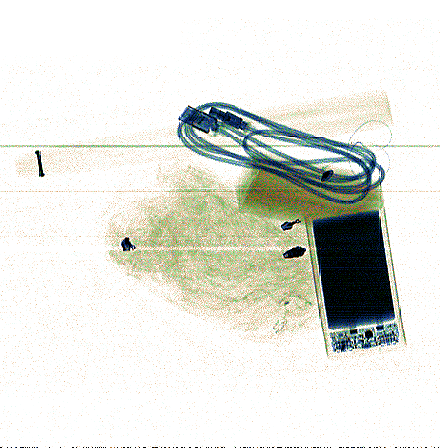

In [ ]:
from PIL import Image
import os

safe_dir = "/content/dataset_safe"
prohib_dir = "/content/dataset_prohibited"

def get_random_image_info(path):
    file = os.listdir(path)[0]  # pick one file
    img = Image.open(os.path.join(path, file))
    print("File:", file)
    print("Formato:", img.format)
    print("Dimensione:", img.size)
    print("Mode:", img.mode)
    return img

img_safe = get_random_image_info(safe_dir)
img_safe


*Valutiamo la qualità visiva delle immagini*

File: xray_41062.png
Formato: PNG
Dimensione: (633, 483)
Mode: RGB


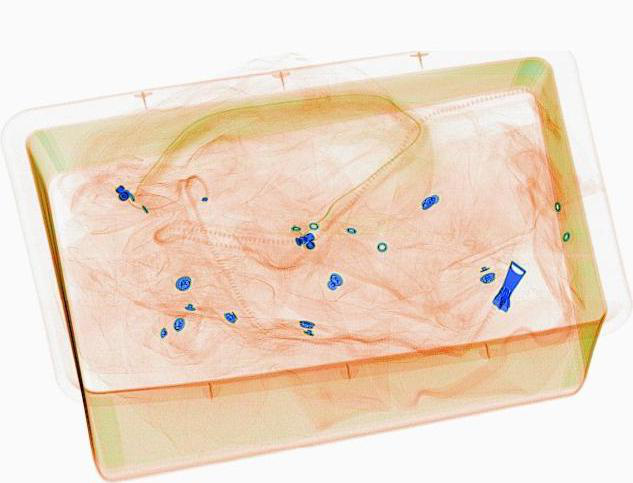

In [ ]:
img_prohib = get_random_image_info(prohib_dir)
img_prohib


*Visualizziamo delle immagini in modo casuale*

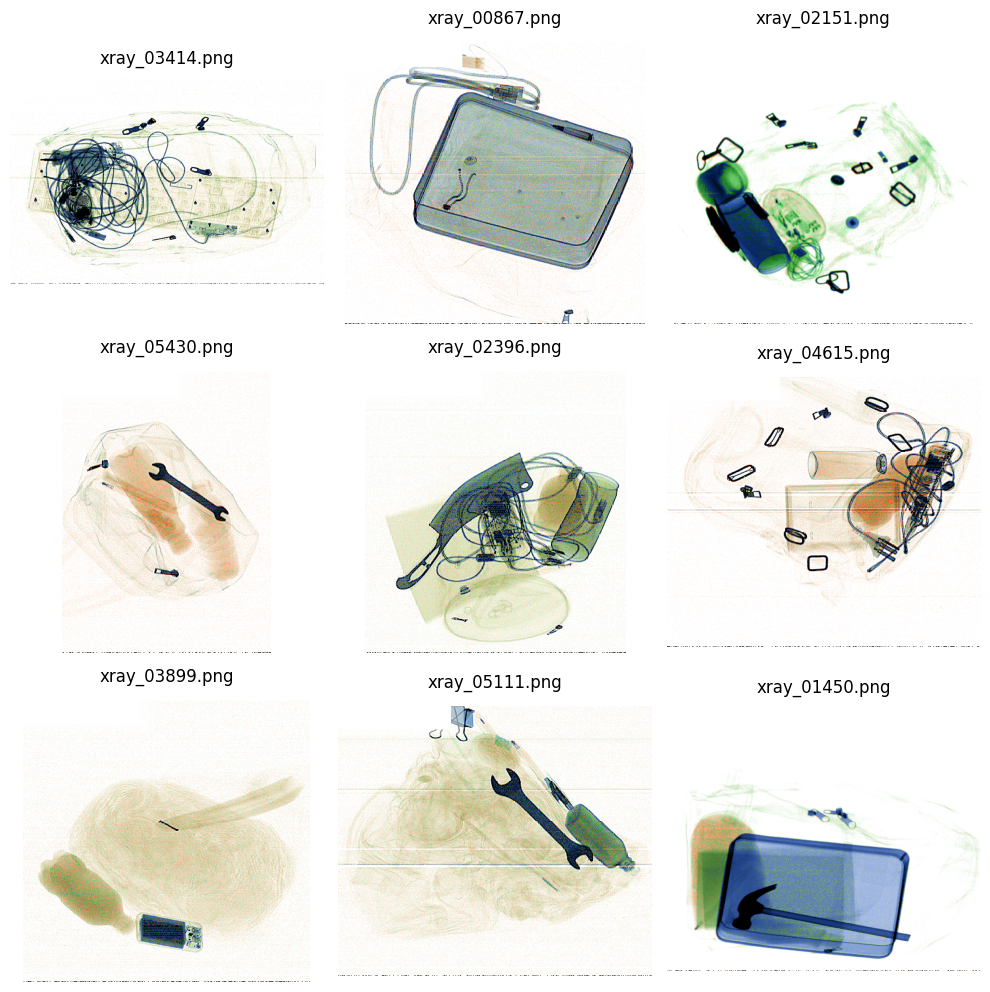

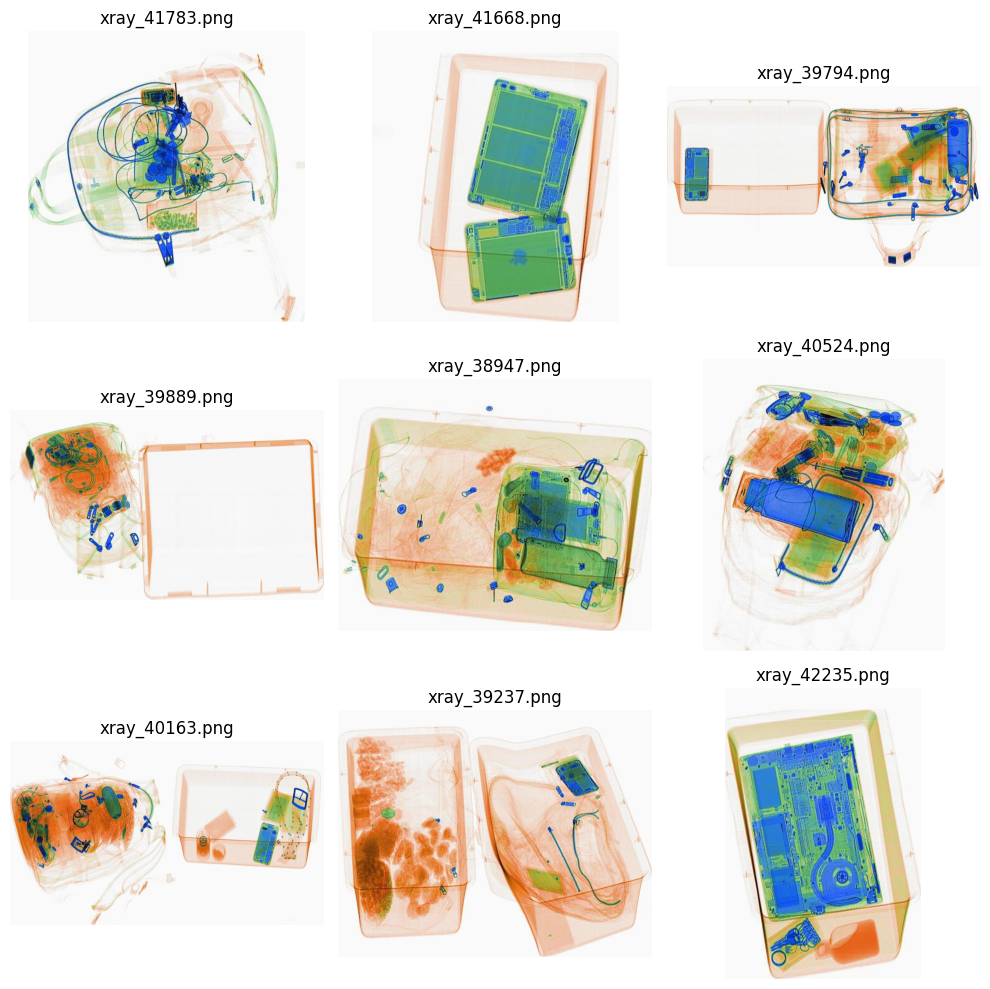

In [ ]:
import matplotlib.pyplot as plt
import random

def show_random_images(path, n=9):
    files = os.listdir(path)
    sel = random.sample(files, n)

    plt.figure(figsize=(10,10))
    for i, f in enumerate(sel):
        img = Image.open(os.path.join(path, f))
        plt.subplot(3,3,i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_random_images(safe_dir, n=9)
show_random_images(prohib_dir, n=9)


_Controlliamo se ci sono immagini corrotte (nere, vuote o danneggiate)_

In [ ]:
import numpy as np
def is_black_image(img):
    arr = np.array(img)
    return np.mean(arr) < 5  # threshold

def count_black_images(path):
    count = 0
    for f in os.listdir(path):
        img = Image.open(os.path.join(path, f))
        if is_black_image(img):
            count += 1
    return count

print("SAFE img nere:", count_black_images(safe_dir))
print("PROHIB img nere:", count_black_images(prohib_dir))


SAFE img nere: 0
PROHIB img nere: 0


*Controlliamo la cartella* `annotation.tar.gz`

In [ ]:
!tar -tf $DATASET_DIR/annotation.tar.gz | head -n 20


Tutti file json, apriamone uno per esplorarne il contenuto

In [ ]:
import tarfile
import json
import os

# estrai UN solo file json
with tarfile.open(f"{DATASET_DIR}/annotation.tar.gz", 'r:gz') as tar:
    # prendi il primo file .json che trovi
    json_member = [m for m in tar.getmembers() if m.name.endswith(".json")][0]
    # Modifica il nome del membro per estrarlo direttamente nella cartella specificata
    json_member.name = os.path.basename(json_member.name)
    tar.extract(json_member, path="/content/annotation")

json_path = "/content/annotation/" + os.path.basename(json_member.name)

# leggiamo il json
with open(json_path, 'r') as f:
    js = json.load(f)

print(js)

*Controlliamo velocemente i duplicati*

In [ ]:
len(set(os.listdir(safe_dir))), len(os.listdir(safe_dir))
# se coincidino -> non ci saranno duplicati

In [ ]:
len(set(os.listdir(prohib_dir))), len(os.listdir(prohib_dir))
# se coincidino -> non ci saranno duplicati


*Valutiamo la distribuzione dei colori (se sono grayscale o RGB)*

In [ ]:
import collections

def color_modes(path):
    modes = []
    for f in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, f))
            modes.append(img.mode)
        except:
            continue
    return collections.Counter(modes)

print("SAFE:", color_modes(safe_dir))
print("PROHIB:", color_modes(prohib_dir))


Risultati ottenuti dalla data exploration:
* tutte le immagini sono in RGB
* l'uso di questi colori è coerente con il contesto di scanner x-ray ai controlli aeroportuali:
1. arancione/rosso per materiali organici
2. blu per materiali metallici
3. verde per materiali plastici o elettronici
* non sono presenti immagini corrotte
* le immagini presentano dimensioni differenti
* estensione delle immagini tipo `.png`
* i file contenuti nella cartella `annotation` sono di tipo json (più avanti ci serviranno in fase di test)

# **3. Final Dataset Creation with Split**

Setup paths

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch


In [ ]:
# assicuriamoci che i path puntino alle cartelle dove abbiamo estratto i file

safe_dir = "/content/dataset_safe"
prohib_dir = "/content/dataset_prohibited"

*Random seed per riproducibilità*

In [ ]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    tf.random.set_seed(seed)
    print(f"Random seed impostato a {seed}")

set_seed(42)

Random seed impostato a 42


## 3.1 DataFrame Creation

In [ ]:
data = []

Classe 0 - Safe

In [ ]:
for filename in os.listdir(safe_dir):
    if filename.endswith(".png"):
        data.append({
            'filename': filename,
            'path': os.path.join(safe_dir, filename),
            'label': 0
        })

Classe 1 - Prohibited

In [ ]:
for filename in os.listdir(prohib_dir):
    if filename.endswith(".png"):
        data.append({
            'filename': filename,
            'path': os.path.join(prohib_dir, filename),
            'label': 1
        })

Creiamo il Dataframe

In [ ]:
df = pd.DataFrame(data)

In seguito ad una verifica preliminare, abbiamo deciso di ordinare per filename per evitare rischio di leakage sequenziale

In [ ]:
df = df.sort_values(by='filename').reset_index(drop=True)

In [ ]:
print(f"DataFrame created with {len(df)} total images")
#---
print(df.head())

DataFrame created with 10000 total images
         filename                                  path  label
0  xray_00000.png  /content/dataset_safe/xray_00000.png      0
1  xray_00001.png  /content/dataset_safe/xray_00001.png      0
2  xray_00002.png  /content/dataset_safe/xray_00002.png      0
3  xray_00003.png  /content/dataset_safe/xray_00003.png      0
4  xray_00004.png  /content/dataset_safe/xray_00004.png      0


## 3.2 Splitting

Fase di safe splitting

Il nostro  obiettivo è evitare che frame consecutivi finiscano separati, quindi dividiamo per indice, prendiamo i primi 80% di ogni classe per il train e il resto per il validation

In [ ]:
def safe_split(df, val_size=0.2):
    # Separiamo i df per classe
    df_0 = df[df['label'] == 0].sort_values(by='filename')
    df_1 = df[df['label'] == 1].sort_values(by='filename')

    # Calcoliamo il punto di taglio
    split_idx_0 = int(len(df_0) * (1 - val_size))
    split_idx_1 = int(len(df_1) * (1 - val_size))

    # Tagliamo (Slicing) senza mescolare
    train_0 = df_0.iloc[:split_idx_0]
    val_0 = df_0.iloc[split_idx_0:]

    train_1 = df_1.iloc[:split_idx_1]
    val_1 = df_1.iloc[split_idx_1:]

    # Uniamo
    train_df = pd.concat([train_0, train_1]).reset_index(drop=True)
    val_df = pd.concat([val_0, val_1]).reset_index(drop=True)

    return train_df, val_df

# Eseguiamo lo split sicuro
train_df, val_df = safe_split(df, val_size=0.2)

print("\n--- RISULTATO SPLIT SICURO ---")
print(f"Train set: {len(train_df)} immagini")
print(f"Val set:   {len(val_df)} immagini")


--- RISULTATO SPLIT SICURO ---
Train set: 8000 immagini
Val set:   2000 immagini


Verifichiamo che non ci siano sovrapposizioni

In [ ]:
train_names = set(train_df['filename'])
val_names = set(val_df['filename'])
intersection = train_names.intersection(val_names)
print(f"Sovrapposizioni: {len(intersection)} immagini")
# Verifichiamo che non ci siano sovrapposizioni

Sovrapposizioni: 0 immagini


## 3.3 Dataset & Data Loader

Definiamo la classe Custom Dataset


In [ ]:
class XrayDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = row['path']
        label = row['label']

        # Carica immagine e converti in RGB (anche se è grayscale, ResNet vuole 3 canali)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

Trasformazioni -> 224 x 224

In [38]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        # transforms.RandomHorizontalFlip(), # Puoi attivarlo dopo se vuoi data aug
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

" data_transforms = {\n    'train': transforms.Compose([\n        transforms.Resize((224, 224)),\n        # transforms.RandomHorizontalFlip(), # Puoi attivarlo dopo se vuoi data aug\n        transforms.ToTensor(),\n        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n    ]),\n    'val': transforms.Compose([\n        transforms.Resize((224, 224)),\n        transforms.ToTensor(),\n        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n    ]),\n}\n"

In [39]:
# nuove trasformazioni in bianco e nero

# --- NUOVE TRASFORMAZIONI: FORZATURA GRAYSCALE ---
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        # Questa riga è la magia: rende tutto bianco e nero (mantenendo 3 canali per ResNet)
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        # Normalizzazione standard (media e std su 3 canali uguali ora)
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

In [40]:
# --- RICREA I DATALOADER CON LE NUOVE TRASFORMAZIONI ---
train_dataset = XrayDataset(train_df, transform=data_transforms['train'])
val_dataset = XrayDataset(val_df, transform=data_transforms['val'])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print("Nuovi DataLoader (Grayscale) pronti! Il bias del colore è stato rimosso.")

Nuovi DataLoader (Grayscale) pronti! Il bias del colore è stato rimosso.


Creazione Dataset

In [ ]:
train_dataset = XrayDataset(train_df, transform=data_transforms['train'])
val_dataset = XrayDataset(val_df, transform=data_transforms['val'])

Creazione DataLoader

In [ ]:
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [41]:
# Verifica finale: prendiamo un batch di prova
images, labels = next(iter(train_loader))
print(f"Batch shape immagini: {images.shape}") # Dovrebbe essere [32, 3, 224, 224]

Batch shape immagini: torch.Size([32, 3, 224, 224])


In [42]:
import time
import copy
import torch.nn as nn
import torch.optim as optim

# Definiamo il device (GPU se disponibile)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training su device: {device}")

def train_model(model, criterion, optimizer, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Liste per salvare i grafici dopo
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    model = model.to(device)

    for epoch in range(num_epochs):
        print(f'Epoca {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Ogni epoca ha una fase di training e una di validation
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Modalità addestramento
                dataloader = train_loader
            else:
                model.eval()   # Modalità valutazione
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iteriamo sui dati
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Azzera i gradienti
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + Optimize solo se siamo in training
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistiche
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Salviamo nella history
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Deep copy del modello se è il migliore finora
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training completato in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Miglior Val Acc: {best_acc:.4f}')

    # Carichiamo i pesi migliori
    model.load_state_dict(best_model_wts)
    return model, history

Training su device: cuda:0


In [43]:
from torchvision import models

# 1. Scarichiamo il modello pre-addestrato
print("Configurazione Baseline (ResNet18)...")
model_resnet = models.resnet18(pretrained=True)

# 2. Congeliamo i pesi (Feature Extractor) - Opzionale
# Se vuoi fare Fine-Tuning completo, commenta le due righe sotto.
# Per ora le blocchiamo per vedere quanto è bravo a estrarre feature generiche.
# for param in model_resnet.parameters():
#     param.requires_grad = False

# 3. Modifichiamo l'ultimo strato (Fully Connected)
# ResNet18 ha 'fc' come ultimo strato. In origine ha 1000 classi, noi ne vogliamo 2.
num_ftrs = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs, 2)

# 4. Definiamo Loss e Optimizer
criterion = nn.CrossEntropyLoss()
# Ottimizziamo tutti i parametri (se non li hai congelati sopra)
optimizer_resnet = optim.Adam(model_resnet.parameters(), lr=0.001)

# 5. Avvio Training Baseline
# Facciamo 5 epoche per iniziare e vedere come va
model_resnet, history_resnet = train_model(
    model_resnet,
    criterion,
    optimizer_resnet,
    num_epochs=5
)

Configurazione Baseline (ResNet18)...
Epoca 1/5
----------
train Loss: 0.0182 Acc: 0.9941
val Loss: 0.0001 Acc: 1.0000

Epoca 2/5
----------
train Loss: 0.0028 Acc: 0.9990
val Loss: 0.6317 Acc: 0.8190

Epoca 3/5
----------
train Loss: 0.0037 Acc: 0.9990
val Loss: 0.0341 Acc: 1.0000

Epoca 4/5
----------
train Loss: 0.0002 Acc: 0.9999
val Loss: 0.0000 Acc: 1.0000

Epoca 5/5
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Training completato in 9m 14s
Miglior Val Acc: 1.0000


In [44]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def train_model_with_metrics(model, criterion, optimizer, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_f1 = 0.0

    history = {'train_loss': [], 'train_acc': [], 'train_f1': [],
               'val_loss': [], 'val_acc': [], 'val_f1': []}

    model = model.to(device)

    for epoch in range(num_epochs):
        print(f'Epoca {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Liste per accumulare predizioni e label di tutta l'epoca
            all_preds = []
            all_labels = []

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                # Salviamo le predizioni per calcolare F1 dopo
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            # Calcolo F1 Score (weighted gestisce bene il leggero sbilanciamento)
            epoch_f1 = f1_score(all_labels, all_preds, average='weighted')

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} F1: {epoch_f1:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
                history['train_f1'].append(epoch_f1)
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())
                history['val_f1'].append(epoch_f1)

            # Salviamo il modello se migliora l'Accuracy (o potresti scegliere F1)
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training completato in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Miglior Val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model, history

In [46]:
def show_confusion_matrix(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    print("Generazione Confusion Matrix...")
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calcoliamo la matrice
    cm = confusion_matrix(all_labels, all_preds)

    # Plotting con Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Safe (0)', 'Prohibited (1)'],
                yticklabels=['Safe (0)', 'Prohibited (1)'])
    plt.xlabel('Predizione Modello')
    plt.ylabel('Realtà (Ground Truth)')
    plt.title('Confusion Matrix')
    plt.show()

    # Stampa anche il report testuale completo
    print("\nClassification Report completo:")
    print(classification_report(all_labels, all_preds, target_names=['Safe', 'Prohibited']))

In [ ]:
# 1. Training con le nuove metriche
model_resnet, history_resnet = train_model_with_metrics(
    model_resnet,
    criterion,
    optimizer_resnet,
    num_epochs=5  # O quante ne vuoi fare
)

# 2. Visualizzazione finale dell'errore
show_confusion_matrix(model_resnet, val_loader)

Epoca 1/5
----------
train Loss: 0.0164 Acc: 0.9941 F1: 0.9941
val Loss: 1.9018 Acc: 0.7755 F1: 0.7494

Epoca 2/5
----------
train Loss: 0.0088 Acc: 0.9974 F1: 0.9974
val Loss: 0.0002 Acc: 1.0000 F1: 1.0000

Epoca 3/5
----------


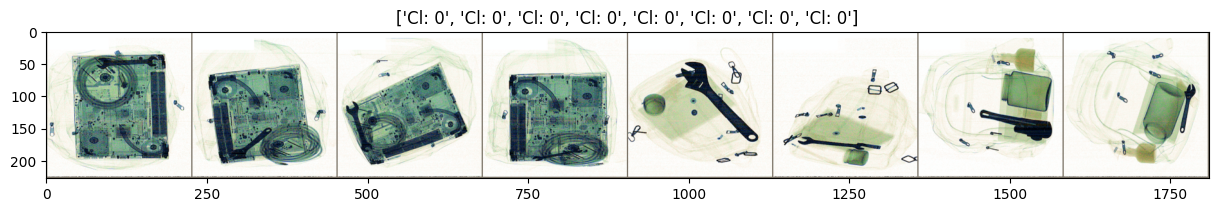

Legenda: 0 = SAFE, 1 = PROHIBITED


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(inp, title=None):
    """Funzione per visualizzare i tensori come immagini"""
    inp = inp.numpy().transpose((1, 2, 0))
    # Dobbiamo denormalizzare usando la media e dev standard che abbiamo usato nel dataloader
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.pause(0.001)

# Preleviamo un batch dal validation set (dove fa il 100%)
inputs, classes = next(iter(val_loader))

# Prendiamo solo 8 immagini per vederle bene
inputs = inputs[:8]
classes = classes[:8]

# Creiamo una griglia
out = torchvision.utils.make_grid(inputs)

plt.figure(figsize=(15, 5))
imshow(out, title=[f"Cl: {x.item()}" for x in classes])
print("Legenda: 0 = SAFE, 1 = PROHIBITED")

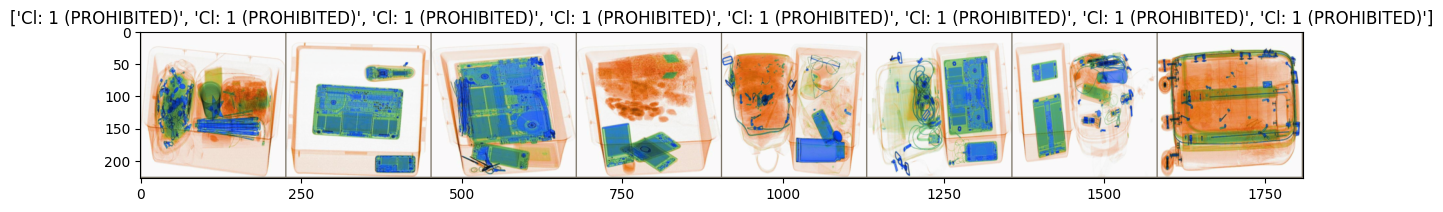

In [36]:
# Cerchiamo specificamente immagini della Classe 1 nel validation set
found_images = []
found_labels = []

# Scorro il dataset finché non trovo 8 immagini della classe 1
for img, label in val_dataset:
    if label == 1:
        found_images.append(img)
        found_labels.append(label)
    if len(found_images) >= 8:
        break

# Converto in tensore batch
inputs = torch.stack(found_images)
classes = torch.tensor(found_labels)

# Visualizzo
out = torchvision.utils.make_grid(inputs)
plt.figure(figsize=(15, 5))
imshow(out, title=[f"Cl: {x.item()} (PROHIBITED)" for x in classes])